## Dataset is taken from Kaggle:- https://www.kaggle.com/

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_orig = pd.read_csv("Bengaluru_House_Data.csv")
df_orig[:5]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [265]:
df = df_orig.copy()
print(df.shape)
df.info()

(13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


i:\anaconda\envs\housepricepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
i:\anaconda\envs\housepricepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
i:\anaconda\envs\housepricepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


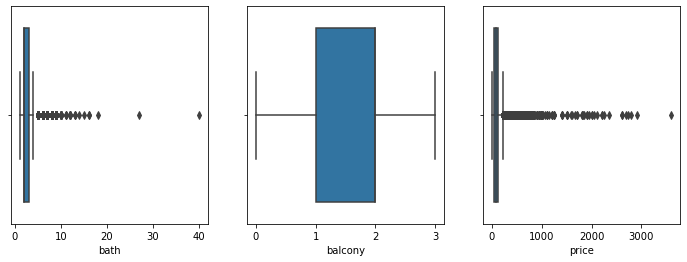

In [266]:
print(df.describe())

fig = plt.figure(figsize=(12,4))

features = ["bath", "balcony", "price"]
for count, feature in enumerate(features):
    #print(count, feature)
    plt.subplot(1,len(features),count+1)
    sns.boxplot(df.loc[:, feature])
    

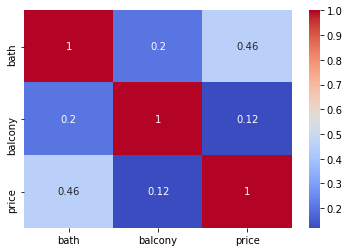

In [267]:
# correlation heatmap
sns.heatmap(df.corr(),cmap="coolwarm", annot=True)
plt.show()

In [268]:
"""Data Preperation and cleaning """

print(df.isnull().sum() )
df.isnull().mean() *100

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

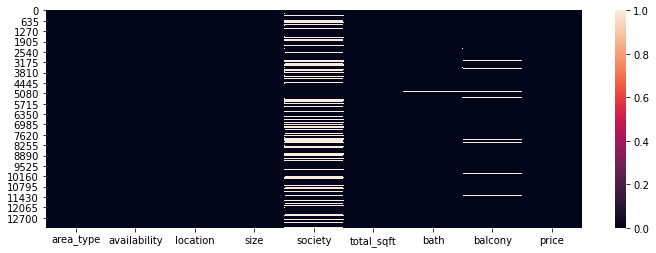

In [269]:
#null values visual representation
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull())
plt.show()

In [270]:
#here i need to drop "society" column bcoz it contains more than 40% of null values 
df.drop("society", axis=1, inplace=True)

In [271]:
# "balcony" has less than 5% of null value so here i decide to fill the null values with mean 
# (may you can go for median or use manual techinque )

print( df["balcony"].isnull().mean() *100 )
df["balcony"].fillna( df["balcony"].mean(), inplace=True )

4.572072072072072


In [272]:
df.isnull().mean() *100 

area_type       0.000000
availability    0.000000
location        0.007508
size            0.120120
total_sqft      0.000000
bath            0.548048
balcony         0.000000
price           0.000000
dtype: float64

In [273]:
#here null value are low so i decide to drop it bcoz it would not effect our data.
df.dropna(inplace=True)

In [274]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [275]:
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00


In [276]:
""" Converting categorical feature into numeric """

""" working on total_sqft feature """

print( df['total_sqft'].dtypes)
df['total_sqft'].unique()[:1000]
 
# here we observe that 'total_sqft' contain string value in diff format like float, range etc
# float - '1330.74'
# range value: '2100 - 2850' 
# string: '1100Sq. Yards'

object


array(['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300',
       '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175',
       '1180', '1540', '2770', '600', '1755', '2800', '1767', '510',
       '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075',
       '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143',
       '1296', '1254', '1330.74', '970', '1459', '800', '869', '1270',
       '1670', '2010', '1185', '1600', '1500', '1407', '840', '4395',
       '845', '5700', '1160', '3000', '1140', '1220', '1350', '1005',
       '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511',
       '460', '4400', '1660', '1326', '1325', '1499', '1665', '708',
       '1060', '710', '1450', '2894', '1330', '2502', '650', '2400',
       '1007', '966', '1630', '1640', '782', '1260', '1413', '1116',
       '1530', '3700', '2497', '1436', '276', '1427', '2061',
       '3067 - 8156', '2650', '1282', '1050', '945', '950', '1870', '880',
       '1535', '1360', '1

In [277]:
#method to convert the strings into number by spliting it
 
total_sqft_int = []
for strValue in df['total_sqft']:
    try:
        total_sqft_int.append(float(strValue))
    except:
        try:
            value = strValue.split('-')
            total_sqft_int.append((float(value[0])+float(value[1]))/2) #split the string value and take mean
        except:
            total_sqft_int.append(np.nan)

print(total_sqft_int)

[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170.0, 2732.0, 3300.0, 1310.0, 1020.0, 1800.0, 2785.0, 1000.0, 1100.0, 2250.0, 1175.0, 1180.0, 1540.0, 2770.0, 1100.0, 600.0, 1755.0, 2800.0, 1767.0, 510.0, 1250.0, 660.0, 1610.0, 1151.0, 1025.0, 2475.0, 1075.0, 1760.0, 1693.0, 1925.0, 700.0, 1070.0, 1724.0, 1290.0, 1143.0, 1296.0, 1254.0, 600.0, 660.0, 1330.74, 600.0, 970.0, 1459.0, 800.0, 869.0, 1270.0, 1670.0, 2010.0, 1185.0, 1600.0, 1200.0, 1500.0, 1407.0, 840.0, 4395.0, 845.0, 5700.0, 1160.0, 3000.0, 1100.0, 1140.0, 1220.0, 1350.0, 1005.0, 500.0, 1358.0, 1569.0, 1240.0, 2089.0, 1206.0, 1150.0, 2511.0, 460.0, 4400.0, 1660.0, 1326.0, 1325.0, 1499.0, 3000.0, 1665.0, 708.0, 1060.0, 710.0, 1000.0, 1000.0, 1450.0, 1200.0, 1296.0, 1540.0, 2894.0, 1330.0, 1200.0, 1200.0, 2502.0, 650.0, 2400.0, 1007.0, 1200.0, 966.0, 1630.0, 1640.0, 782.0, 1260.0, 1800.0, 1413.0, 1116.0, 1530.0, 3700.0, 2497.0, 1540.0, 1436.0, 1100.0, 276.0, 1427.0, 2061.0, 5611.5, 2650.0, 1282.0, 1050.0, 1600.0, 945.0, 1500.0, 950

In [278]:
df['total_sqft_int'] = total_sqft_int
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00,1170.0
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0


In [279]:
df.isnull().sum()
df.dropna(inplace=True)
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00,1170.0
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0


In [280]:
""" working on size feature """

print( df['size'].dtypes)
df['size'].unique()
 

object


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [281]:
#here we assume that BHK ==Bedroom ==RK so only take numbers

size_int = []
for strValue in df['size']:
    value = strValue.split(" ")
    try:
        size_int.append(int(value[0]))
    except:
        size_int.append(np.nan)

print(size_int)

[2, 4, 3, 3, 2, 2, 4, 4, 3, 6, 3, 4, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 4, 3, 1, 3, 2, 3, 2, 3, 4, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 1, 1, 2, 8, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 6, 2, 3, 2, 4, 2, 8, 2, 2, 2, 8, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 6, 3, 2, 3, 3, 6, 3, 2, 2, 6, 2, 2, 3, 4, 2, 3, 4, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 4, 4, 3, 2, 3, 2, 2, 7, 3, 3, 2, 4, 3, 2, 2, 2, 3, 3, 8, 5, 3, 2, 2, 7, 3, 2, 3, 6, 3, 2, 3, 3, 2, 2, 2, 3, 3, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 6, 1, 2, 3, 3, 3, 5, 1, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 4, 3, 4, 7, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 4, 4, 3, 3, 3, 3, 2, 6, 1, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 5, 2, 1, 8, 1, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 5, 3, 4, 3, 2, 2, 2, 4, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 2, 3, 6, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 3, 2, 3, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 2, 2, 3, 3, 2, 4, 2, 3, 2, 

In [282]:
df["bhk"] = size_int
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00,1170.0,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0,4


In [283]:
""" working on area_type feature """

print(df["area_type"].dtypes)
df["area_type"].value_counts()


object


Super built-up  Area    8729
Built-up  Area          2394
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

In [284]:
labels = df["area_type"].value_counts().index
print(labels)
print("lenght of labels: " +str(len(labels)))
# You can achieve the mapping with the help of dictionary comprehensions as shown below.
# This will be useful when the categories count is high and you don't want to type out each mapping.

area_type_int = {'area_type' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
area_type_int

Index(['Super built-up  Area', 'Built-up  Area', 'Plot  Area', 'Carpet  Area'], dtype='object')
lenght of labels: 4


{'area_type': {'Super built-up  Area': 0,
  'Built-up  Area': 1,
  'Plot  Area': 2,
  'Carpet  Area': 3}}

In [285]:
df.replace(area_type_int, inplace=True)
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0,2
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0,4
2,1,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0,3
3,0,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0,3
4,0,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0,2
5,0,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00,1170.0,2
6,0,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0,4


In [286]:
""" working on availability feature """

print(df["availability"].dtypes)
df["availability"].unique()


object


array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [287]:

def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2


In [288]:
df['availability']  = df['availability'] .apply(replace_availabilty)

In [289]:
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,0,2,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0,2
1,2,0,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0,4
2,1,0,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0,3
3,0,0,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0,3
4,0,0,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0,2
5,0,0,Whitefield,2 BHK,1170,2.0,1.000000,38.00,1170.0,2
6,0,2,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0,4


In [290]:
""" working on location feature """

print(df["location"].dtypes)
print(df["location"].nunique())
df["location"].unique()[:50]
#df["location"].value_counts()

object
1298


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Gandhi Bazar',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout',
       'Manayata Tech Park', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', ' Thanisandra', 'Mangammanapalya', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kasturi Nagar',
       'Kanakpura Road', 'Electronics City Phase 1', 'Kundalahalli',
       'Chikkalasandra', 'Murugeshpalya', 'Sarjapur  Road', 'Ganga Nagar',
       'HSR Layout', 'Doddathoguru', 'KR Puram', 'Himagiri Meadows',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Govindaraja Nagar Ward', 'Tharabanahalli',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli'],
      dtype=object)

In [291]:
labels = df["location"].value_counts().index
#print(labels)
print("lenght of labels: " +str(len(labels)))
# You can achieve the mapping with the help of dictionary comprehensions as shown below.
# This will be useful when the categories count is high and you don't want to type out each mapping.

location_int = {'location' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
location_int

lenght of labels: 1298


{'location': {'Whitefield': 0,
  'Sarjapur  Road': 1,
  'Electronic City': 2,
  'Kanakpura Road': 3,
  'Thanisandra': 4,
  'Yelahanka': 5,
  'Uttarahalli': 6,
  'Hebbal': 7,
  'Marathahalli': 8,
  'Raja Rajeshwari Nagar': 9,
  'Bannerghatta Road': 10,
  'Hennur Road': 11,
  '7th Phase JP Nagar': 12,
  'Haralur Road': 13,
  'Electronic City Phase II': 14,
  'Rajaji Nagar': 15,
  'Chandapura': 16,
  'Bellandur': 17,
  'Hoodi': 18,
  'KR Puram': 19,
  'Electronics City Phase 1': 20,
  'Yeshwanthpur': 21,
  'Begur Road': 22,
  'Sarjapur': 23,
  'Harlur': 24,
  'Kasavanhalli': 25,
  'Banashankari': 26,
  'Hormavu': 27,
  'Kengeri': 28,
  'Ramamurthy Nagar': 29,
  'Koramangala': 30,
  'Old Madras Road': 31,
  'Varthur': 32,
  'Hosa Road': 33,
  'Jakkur': 34,
  'Kothanur': 35,
  'JP Nagar': 36,
  'Kaggadasapura': 37,
  'Nagarbhavi': 38,
  'Akshaya Nagar': 39,
  'Thigalarapalya': 40,
  'TC Palaya': 41,
  'Malleshwaram': 42,
  '8th Phase JP Nagar': 43,
  'Rachenahalli': 44,
  'Budigere': 45,
  

In [292]:
df.replace(location_int, inplace=True)
df[:7]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,0,2,14,2 BHK,1056,2.0,1.000000,39.07,1056.0,2
1,2,0,163,4 Bedroom,2600,5.0,3.000000,120.00,2600.0,4
2,1,0,6,3 BHK,1440,2.0,3.000000,62.00,1440.0,3
3,0,0,131,3 BHK,1521,3.0,1.000000,95.00,1521.0,3
4,0,0,35,2 BHK,1200,2.0,1.000000,51.00,1200.0,2
5,0,0,0,2 BHK,1170,2.0,1.000000,38.00,1170.0,2
6,0,2,92,4 BHK,2732,4.0,1.584376,204.00,2732.0,4


In [293]:
#df.isnull().sum()
#df.info()

df_final = df.drop(["size","total_sqft" ], axis=1)
df_final.reset_index(drop=True, inplace=True)
df_final[:7]

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk
0,0,2,14,2.0,1.000000,39.07,1056.0,2
1,2,0,163,5.0,3.000000,120.00,2600.0,4
2,1,0,6,2.0,3.000000,62.00,1440.0,3
3,0,0,131,3.0,1.000000,95.00,1521.0,3
4,0,0,35,2.0,1.000000,51.00,1200.0,2
5,0,0,0,2.0,1.000000,38.00,1170.0,2
6,0,2,92,4.0,1.584376,204.00,2732.0,4


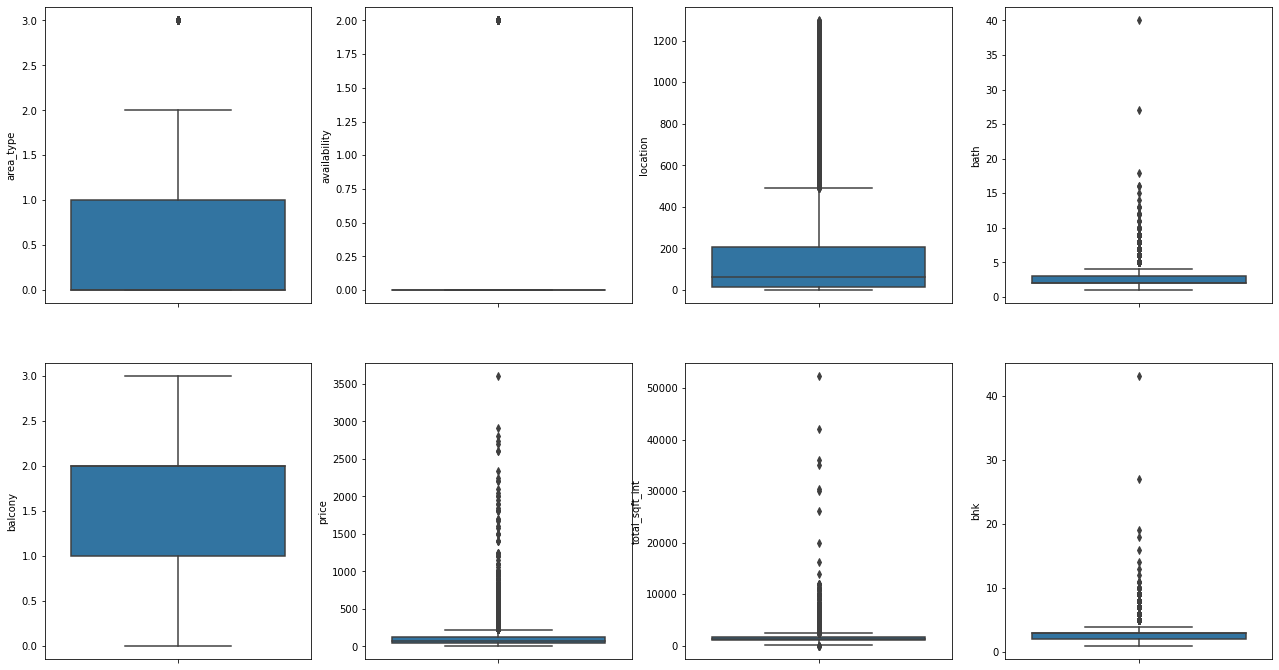

In [294]:
#print(df_final.describe())

fig = plt.figure(figsize=(22,12))

for count, feature in enumerate(df_final):
    #print(count, feature)
    plt.subplot(2,4,count+1)
    sns.boxplot(y=df_final.loc[:, feature])

In [295]:
df_final.to_csv("clean_data_1.csv", index=False) # train and test the machine learning model on this data

we can also work on outliers to get more accurate data and create new features that helps to train the model more efficiently but i need to stop here. 